In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


In [3]:
import pandas as pd

df = pd.read_csv('./WELFake_Dataset.csv')
df.head()


,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
df = df.drop('Unnamed: 0', axis = 1)
df.dropna(inplace = True)


In [5]:
df.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 71537 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   71537 non-null  object
 1   text    71537 non-null  object
 2   label   71537 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.2+ MB


In [7]:
df.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [8]:
# selecting 1000 rows randomly
#df = df.sample(n = 10000, random_state = 42)
#df.info()


# Pre-processing

In [9]:
#removing other than alphates and digits
import re
df['title'] = df['title'].str.replace(r"[^\w\s]", "").str.replace(r"\d", "")
df['text'] = df['text'].str.replace(r"[^\w\s]","").str.replace(r"\d", "")
df.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [10]:
df.head()


,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1


In [11]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

# Function to tokenize and remove stopwords from text
def tokenize_and_remove_stopwords(text):
    # Convert the text to lowercase to ensure consistency
    text = text.lower()

    # Get the set of English stopwords from NLTK
    stop_words = set(stopwords.words('english'))

    # Tokenize the text into words
    tokens = word_tokenize(text)

    # Remove stopwords from the list of tokens
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Reconstruct the text by joining the remaining tokens
    filtered_text = " ".join(filtered_tokens)

    return filtered_text


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nhatanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/nhatanh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [12]:
# Apply the function to the 'text_column' and create a new column 'filtered_text_column'
df['title'] = df['title'].apply(tokenize_and_remove_stopwords)
df['text'] = df['text'].apply(tokenize_and_remove_stopwords)
df.head()


,title,text,label
0,law enforcement high alert following threats c...,comment expected barack obama members # fyf911...,1
2,unbelievable ! obama ’ attorney general says c...,", demonstrators gathered last night exercising...",1
3,"bobby jindal , raised hindu , uses story chris...",dozen politically active pastors came private ...,0
4,satan 2 : russia unvelis image terrifying new ...,"rs-28 sarmat missile , dubbed satan 2 , replac...",1
5,time ! christian group sues amazon splc design...,say one time someone sued southern poverty law...,1


In [13]:
df.groupby('label').describe()


title                                                                 \
       count unique                                                top freq   
label                                                                         
0      35028  34398      factbox : trump fills top jobs administration   14   
1      36509  27794  barack obama delay suspend election hillary fo...    8   

        text                                                                 
       count unique                                                top freq  
label                                                                        
0      35028  34619  killing obama administration rules , dismantli...   58  
1      36509  27563                                                     743

In [14]:
#X = df[['text', 'title']]
X = df['text']+df['title']
y = df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42, stratify = y)


In [15]:
type(X_train)


pandas.core.series.Series

In [16]:
X_train.head()


9140     tel aviv — israeli prison service released vid...
65396    breaking : white house abandons tpp & ttip nov...
19656    san francisco ( reuters ) - facebook inc said ...
59765    austin , texas ( reuters ) - bill would restri...
45119    great fit ! tim tebow good man newbie politics...
dtype: object

# bert cnn

In [17]:
!pip install "tensorflow==2.19.0" "tensorflow-text==2.19.0"


In [18]:
import tensorflow as tf
print(tf.__version__)


2025-11-27 20:34:18.353145: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-27 20:34:18.397858: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1764250458.417736  121338 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1764250458.423990  121338 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1764250458.442695  121338 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0


In [19]:
!pip install "tensorflow==2.19.0" "tensorflow-text==2.19.0" "tensorflow-hub" "tf-keras<2.20"


In [20]:
# bert embedding
import tensorflow_text as text
import tensorflow_hub as hub

bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")


I0000 00:00:1764250464.885486  121338 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


In [21]:
import tensorflow as tf
import tensorflow_hub as hub
import tf_keras as keras
from tf_keras import layers  # <--- WE MUST USE THIS FOR ALL LAYERS

# 1. Define Input (using tf_keras)
bert_input = layers.Input(shape=(), dtype=tf.string, name='text')

# 2. BERT Layers
preprocessed_text = bert_preprocess(bert_input)
outputs = bert_encoder(preprocessed_text)

# 3. Downstream Layers
# Important: Do NOT import Conv1D/Dense from tensorflow.keras.
# Use 'layers.Conv1D', 'layers.Dense' from the 'tf_keras' import above.

# Extract sequence output
sequence_output = outputs['sequence_output']


In [22]:
# # CNN Layers
# con1 = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(sequence_output)
# max_p1 = layers.MaxPooling1D(pool_size=2, strides=2, padding='valid')(con1)
# b = layers.BatchNormalization()(max_p1)

# con2 = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(b)
# max_p2 = layers.MaxPooling1D(pool_size=2, strides=2, padding='valid')(con2)

# f = layers.Flatten()(max_p2)
# d1 = layers.Dense(128, activation='relu')(f)
# output_layer = layers.Dense(1, activation='sigmoid')(d1)

# Layer 1: Conv1D -> BatchNormalization (NO Pooling here)
conv1 = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(sequence_output)
b1 = layers.BatchNormalization()(conv1)

# Layer 2: Conv1D -> MaxPool
conv2 = layers.Conv1D(filters=32, kernel_size=3, activation='relu')(b1)
max_p1 = layers.MaxPooling1D(pool_size=2, strides=2, padding='valid')(conv2)

# Layer 3: Flatten -> Dense
f = layers.Flatten()(max_p1)
d1 = layers.Dense(128, activation='relu')(f)
output_layer = layers.Dense(1, activation='sigmoid')(d1)

# 4. Build Model
model_1 = keras.Model(inputs=[bert_input], outputs=output_layer)

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                              

In [34]:
hist = model_1.fit(X_train, y_train, validation_data = (X_test, y_test),batch_size=20, epochs=20, verbose=2)
accr = model_1.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy', accr[1])


Epoch 1/20
2862/2862 - 294s - loss: 0.1159 - accuracy: 0.9536 - val_loss: 0.0704 - val_accuracy: 0.9737 - 294s/epoch - 103ms/step
Epoch 2/20
2862/2862 - 290s - loss: 0.0628 - accuracy: 0.9772 - val_loss: 0.0595 - val_accuracy: 0.9780 - 290s/epoch - 101ms/step
Epoch 3/20
2862/2862 - 289s - loss: 0.0457 - accuracy: 0.9832 - val_loss: 0.0489 - val_accuracy: 0.9816 - 289s/epoch - 101ms/step
Epoch 4/20
2862/2862 - 287s - loss: 0.0342 - accuracy: 0.9875 - val_loss: 0.0469 - val_accuracy: 0.9832 - 287s/epoch - 100ms/step
Epoch 5/20
2862/2862 - 288s - loss: 0.0233 - accuracy: 0.9915 - val_loss: 0.0634 - val_accuracy: 0.9783 - 288s/epoch - 101ms/step
Epoch 6/20
2862/2862 - 284s - loss: 0.0197 - accuracy: 0.9932 - val_loss: 0.0671 - val_accuracy: 0.9822 - 284s/epoch - 99ms/step
Epoch 7/20
2862/2862 - 261s - loss: 0.0163 - accuracy: 0.9947 - val_loss: 0.0717 - val_accuracy: 0.9800 - 261s/epoch - 91ms/step
Epoch 8/20
2862/2862 - 262s - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.0742 - val_accur

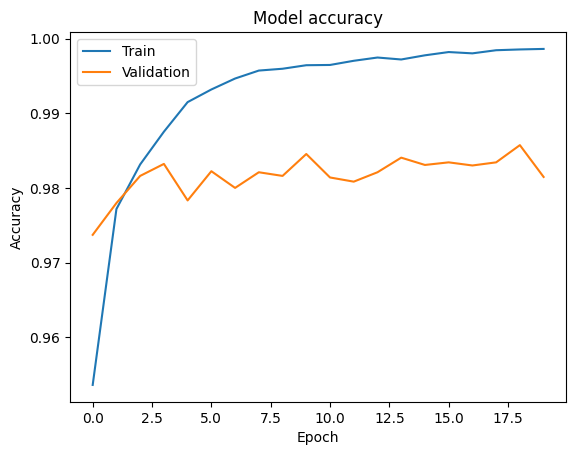

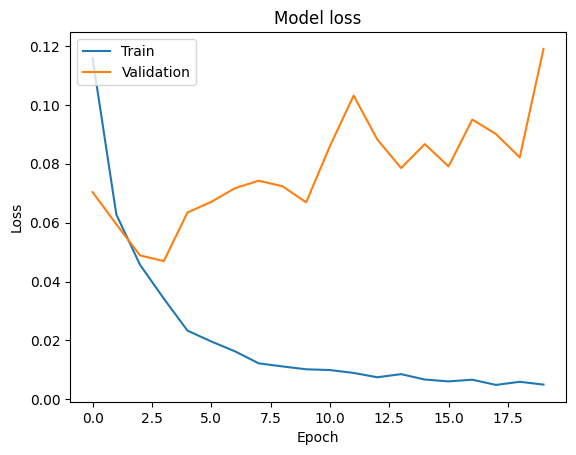

In [36]:
# Plotting training & validation accuracy values
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [31]:
# Save the model 1
model_1.save('welfake_bert_model_1.h5')


# bert_model (cnn + bilstm) 

In [23]:
# bert layers

num_classes = 1

conv1 = layers.Conv1D(filters = 32,kernel_size = 3, activation = 'relu')(outputs['sequence_output'])
max_pool1 = layers.MaxPooling1D(pool_size = 1, strides =2, padding = 'valid')(conv1)
l2 = layers.BatchNormalization()(max_pool1)
conv2 = layers.Conv1D(filters = 32,kernel_size = 3, activation = 'relu')(l2)
max_pool2 = layers.MaxPooling1D(pool_size = 1, strides =2, padding = 'valid')(conv2)
l3 = layers.BatchNormalization()(max_pool2)
# BiLSTM layer with 64 units
bilstm = layers.Bidirectional(layers.LSTM(units=64, activation='relu'))(l3)
dense1 = layers.Dense(units=64, activation='relu')(bilstm)
output_layer = layers.Dense(units=num_classes, activation='sigmoid')(dense1)

# Create the model
model_2 = keras.Model(inputs=[bert_input], outputs=output_layer)



In [24]:
model_2.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics =  ['binary_accuracy'],
             )

model_2.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_type_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             , 'input_word_ids': (None,                                           
                              128)}                                                               
                                                                                            

In [25]:
hist_2 = model_2.fit(X_train,y_train,validation_data = (X_test, y_test),epochs = 20, batch_size = 20, verbose = 2)


Epoch 1/20


I0000 00:00:1764250485.874623  122135 cuda_dnn.cc:529] Loaded cuDNN version 90300
I0000 00:00:1764250487.199669  122136 service.cc:152] XLA service 0x7fb444567830 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764250487.200252  122136 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3080, Compute Capability 8.6
2025-11-27 20:34:47.229595: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1764250487.531011  122136 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2862/2862 - 597s - loss: 0.2672 - binary_accuracy: 0.8949 - val_loss: 0.1592 - val_binary_accuracy: 0.9353 - 597s/epoch - 209ms/step
Epoch 2/20
2862/2862 - 553s - loss: 0.1218 - binary_accuracy: 0.9521 - val_loss: 0.1224 - val_binary_accuracy: 0.9537 - 553s/epoch - 193ms/step
Epoch 3/20
2862/2862 - 546s - loss: 0.1021 - binary_accuracy: 0.9645 - val_loss: 0.0794 - val_binary_accuracy: 0.9703 - 546s/epoch - 191ms/step
Epoch 4/20
2862/2862 - 545s - loss: 0.0688 - binary_accuracy: 0.9749 - val_loss: 0.0666 - val_binary_accuracy: 0.9744 - 545s/epoch - 191ms/step
Epoch 5/20
2862/2862 - 503s - loss: 0.0573 - binary_accuracy: 0.9785 - val_loss: 0.0561 - val_binary_accuracy: 0.9804 - 503s/epoch - 176ms/step
Epoch 6/20
2862/2862 - 489s - loss: 0.0470 - binary_accuracy: 0.9828 - val_loss: 0.0671 - val_binary_accuracy: 0.9748 - 489s/epoch - 171ms/step
Epoch 7/20
2862/2862 - 490s - loss: 0.0377 - binary_accuracy: 0.9867 - val_loss: 0.0703 - val_binary_accuracy: 0.9783 - 490s/epoch - 171ms/step
Epo

<Axes: title={'center': 'Accuracy'}>

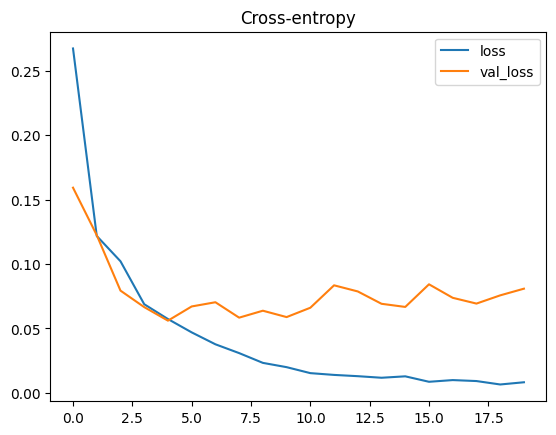

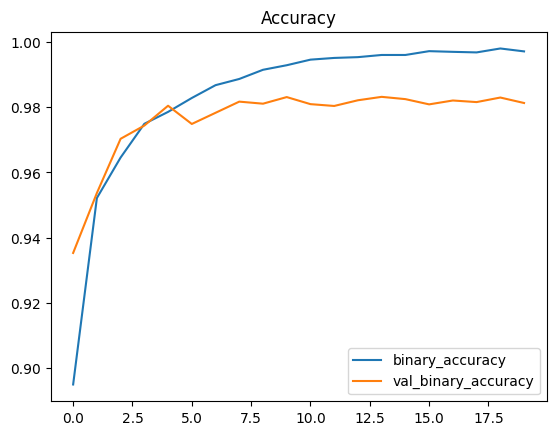

In [26]:
from matplotlib.pyplot import plot
history_df = pd.DataFrame(hist_2.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")


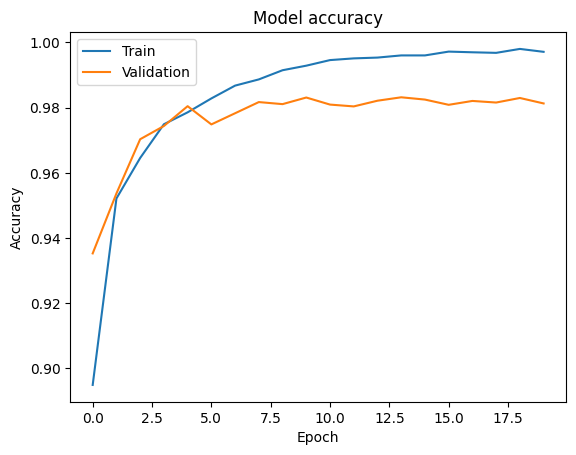

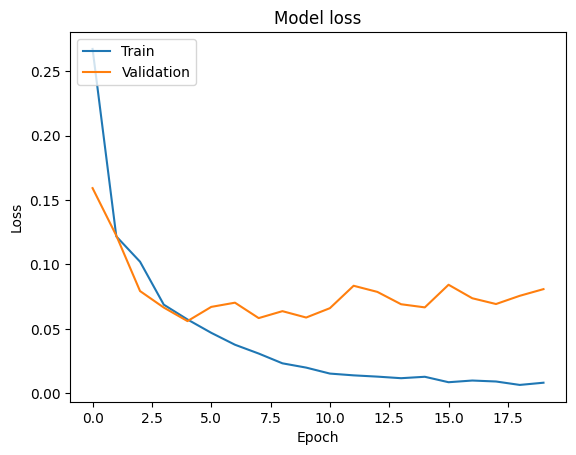

In [27]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
plt.plot(hist_2.history['binary_accuracy'])
plt.plot(hist_2.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# Save the model 2
model_2.save('welfake_bert_model_2.h5')
